In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import sklearn
from sklearn.preprocessing import RobustScaler
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel

%matplotlib inline

print("Modules imported successfully!")


# Load the data from the uploaded Excel file
file_path = './VSM_BRIMS_03_02.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataframe to understand its structure
data.head()


Modules imported successfully!


,task,participant,trial,decision_type,choice,OEE1,OEE2,CT1,CT2
0,0,0,0,0,1,88,86,46,48
1,0,0,1,1,1,88,86,46,48
2,0,0,2,0,1,88,86,46,48
3,0,0,3,0,1,88,86,46,48
4,0,0,4,0,1,88,86,46,48


In [25]:
import pandas as pd
import statsmodels.formula.api as smf

data['participant_task'] = data['participant'].astype(str) + "_" + data['task'].astype(str)

# Convert columns to appropriate types
data['trial'] = data['trial'].astype(int)
data['decision_type'] = data['decision_type'].astype(int)
data['participant_task'] = data['participant_task'].astype('category')

model = smf.mixedlm("decision_type ~ trial", data, groups=data["participant_task"])

result = model.fit(method='nm', maxiter=1000, tol=1e-6)  # Using Nelder-Mead optimizer

if not result.converged:
    print("Warning: The model did not converge")
else:
    print("The model converged successfully.")
print(result.summary())


/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/base/optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method nm is: xtol, ftol, maxfun. The list of unsupported keyword arguments passed include: tol. After release 0.14, this will raise.
  warnings.warn(


The model converged successfully.
           Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: decision_type
No. Observations: 2012    Method:             REML         
No. Groups:       133     Scale:              0.6179       
Min. group size:  14      Log-Likelihood:     -2388.1546   
Max. group size:  16      Converged:          Yes          
Mean group size:  15.1                                     
------------------------------------------------------------
              Coef.  Std.Err.    z     P>|z|  [0.025  0.975]
------------------------------------------------------------
Intercept     0.393     0.038  10.479  0.000   0.320   0.467
trial         0.086     0.004  21.437  0.000   0.078   0.094
Group Var     0.007     0.008                               



/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


In [17]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.miscmodels.ordinal_model import OrderedModel

data['decision_type'] = data['decision_type'].fillna(0).astype(int)

# Ordered logistic regression model without adding a constant
model = OrderedModel(data['decision_type'], 
                     data[['trial']], 
                     distr='logit')

result = model.fit(method='bfgs', disp=False)

print(result.summary())

                             OrderedModel Results                             
Dep. Variable:          decision_type   Log-Likelihood:                -1944.1
Model:                   OrderedModel   AIC:                             3894.
Method:            Maximum Likelihood   BIC:                             3911.
Date:                Mon, 12 Aug 2024                                         
Time:                        15:53:07                                         
No. Observations:                2012                                         
Df Residuals:                    2009                                         
Df Model:                           1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
trial          0.2056      0.011     18.976      0.000       0.184       0.227
0/1            0.8781      0.093      9.439      0.0

/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


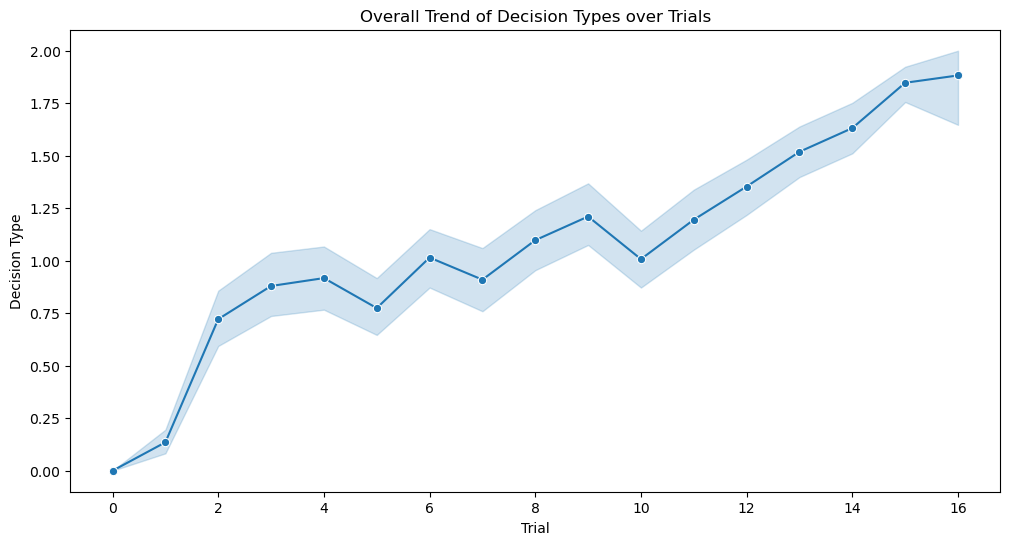

In [16]:
# Plot overall trend of decision types over trials
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='trial', y='decision_type', marker='o')
plt.title('Overall Trend of Decision Types over Trials')
plt.xlabel('Trial')
plt.ylabel('Decision Type')
plt.show()
